In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pickle as pkl
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, RidgeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

In [2]:
#Reading csv file
dataset = pd.read_csv(r"C:\Users\Priyanka\Downloads\HealthCareData.csv")
dataset.head()

,S.NO,Age,Gender,Place(location where the patient lives),Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),Type of alcohol consumed,Hepatitis B infection,Hepatitis C infection,Diabetes Result,...,Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),A/G Ratio,AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L),USG Abdomen (diffuse liver or not),Predicted Value(Out Come-Patient suffering from liver cirrosis or not)
0,1,55,male,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
1,2,55,male,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
2,3,55,male,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
3,4,55,male,rural,12,2,branded liquor,negative,negative,NO,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
4,5,55,female,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES


In [3]:
import pandas as pd

In [4]:
df = pd.read_csv(r"C:\Users\Priyanka\Downloads\HealthCareData.csv")

In [5]:
print(df)
print(df.shape)

     S.NO  Age   Gender Place(location where the patient lives)  \
0       1   55     male                                   rural   
1       2   55     male                                   rural   
2       3   55     male                                   rural   
3       4   55     male                                   rural   
4       5   55   female                                   rural   
..    ...  ...      ...                                     ...   
945   946   54  female                                    rural   
946   947   72  female                                    urban   
947   948   47     male                                   urban   
948   949   54  female                                    rural   
949   950   52     male                                   rural   

     Duration of alcohol consumption(years)  \
0                                        12   
1                                        12   
2                                        12   
3      

In [6]:
df.shape

(950, 42)

In [7]:
df.isnull().any()

S.NO                                                                       False
Age                                                                        False
Gender                                                                     False
Place(location where the patient lives)                                     True
Duration of alcohol consumption(years)                                     False
Quantity of alcohol consumption (quarters/day)                             False
Type of alcohol consumed                                                   False
Hepatitis B infection                                                      False
Hepatitis C infection                                                      False
Diabetes Result                                                            False
Blood pressure (mmhg)                                                      False
Obesity                                                                    False
Family history of cirrhosis/

In [8]:
df.isnull().sum()

S.NO                                                                         0
Age                                                                          0
Gender                                                                       0
Place(location where the patient lives)                                    134
Duration of alcohol consumption(years)                                       0
Quantity of alcohol consumption (quarters/day)                               0
Type of alcohol consumed                                                     0
Hepatitis B infection                                                        0
Hepatitis C infection                                                        0
Diabetes Result                                                              0
Blood pressure (mmhg)                                                        0
Obesity                                                                      0
Family history of cirrhosis/ hereditary             

In [9]:
import numpy as np

In [10]:
categorical_features = df.select_dtypes(include=[np.object_])
categorical_features.columns

Index(['Gender', 'Place(location where the patient lives)',
       'Type of alcohol consumed', 'Hepatitis B infection',
       'Hepatitis C infection', 'Diabetes Result', 'Blood pressure (mmhg)',
       'Obesity', 'Family history of cirrhosis/ hereditary', 'TG', 'LDL',
       'Total Bilirubin    (mg/dl)', 'A/G Ratio',
       'USG Abdomen (diffuse liver or  not)',
       'Predicted Value(Out Come-Patient suffering from liver  cirrosis or not)'],
      dtype='object')

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

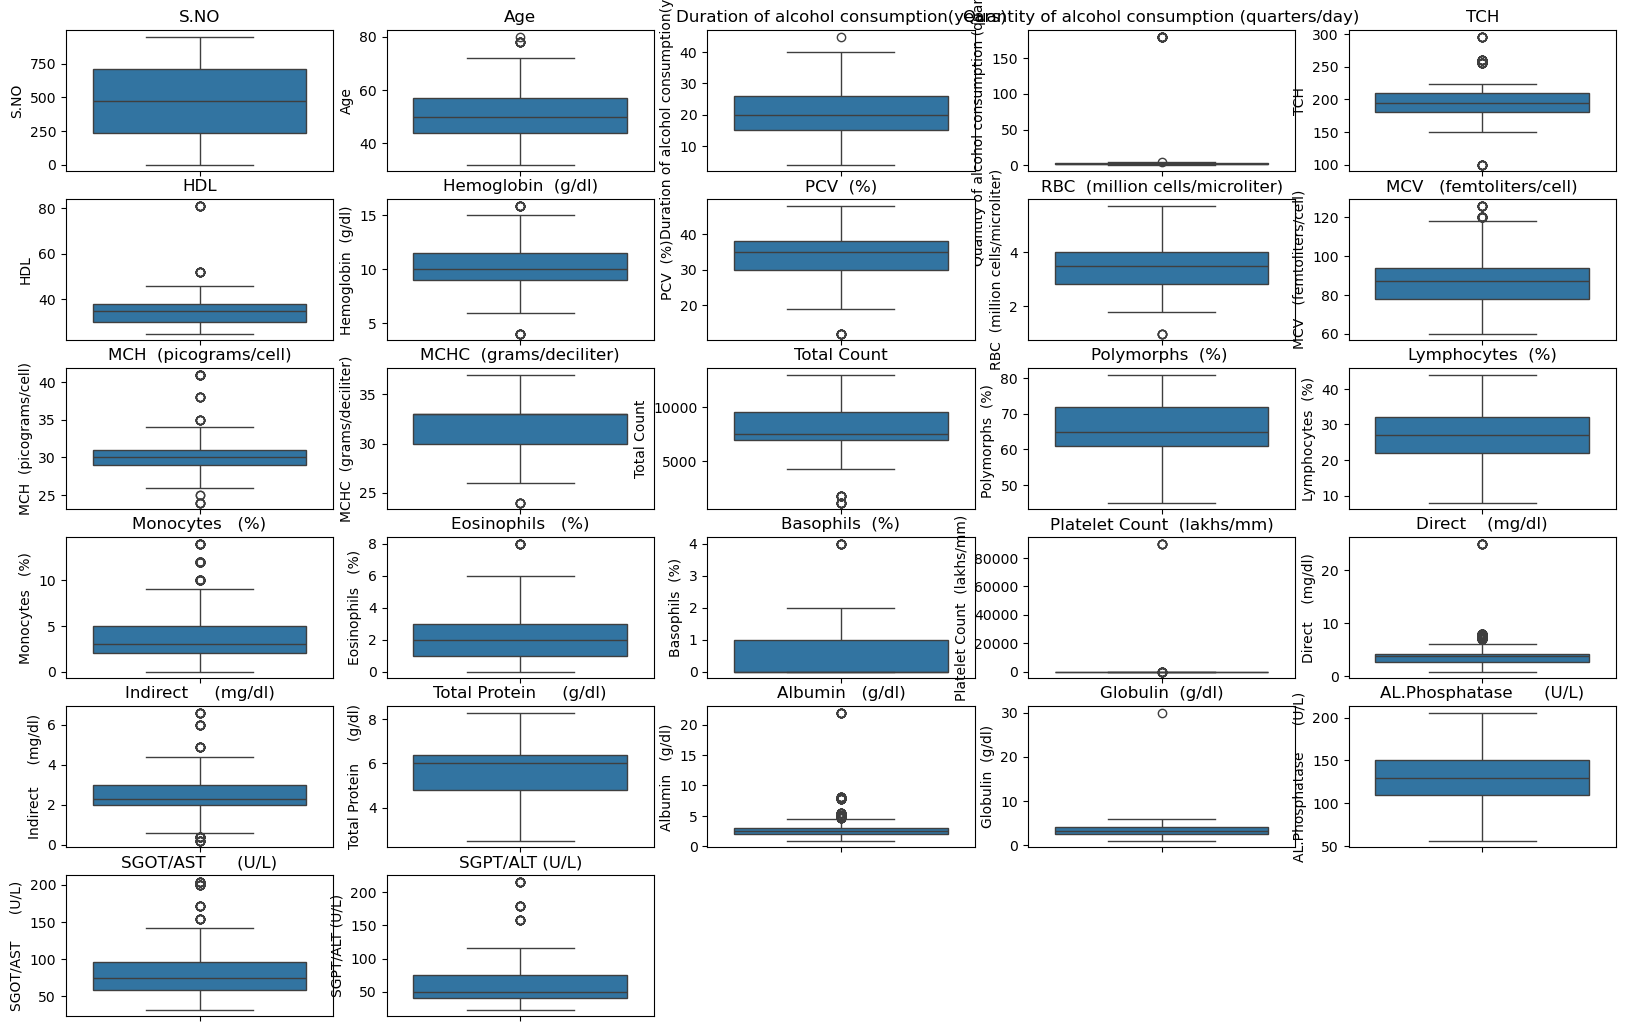

In [12]:
c=0
plt.figure(figsize=(20,15))
for i in df.columns:
    if type(df[i][0])!=str:
        plt.subplot(7,5,c + 1)
        sns.boxplot(df[i])
        plt.title(i)
        c += 1
plt.show()       

In [13]:
df.columns = df.columns.str.strip()


In [14]:
print(df.head())

   S.NO  Age  Gender Place(location where the patient lives)  \
0     1   55    male                                   rural   
1     2   55    male                                   rural   
2     3   55    male                                   rural   
3     4   55    male                                   rural   
4     5   55  female                                   rural   

   Duration of alcohol consumption(years)  \
0                                      12   
1                                      12   
2                                      12   
3                                      12   
4                                      12   

   Quantity of alcohol consumption (quarters/day) Type of alcohol consumed  \
0                                               2           branded liquor   
1                                               2           branded liquor   
2                                               2           branded liquor   
3                               

In [15]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
df=pd.read_csv(r"C:\Users\Priyanka\Downloads\HealthCareData.csv")
df.columns = df.columns.str.strip()
def remove_outliers(column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    upper_limit = q3 + (1.5 * iqr)
    lower_limit = q1 - (1.5 * iqr)
    print(f"{column} - Lower Limit: {lower_limit}, upper Limit: {upper_limit}")
    df[column] = np.where(df[column] > upper_limit, upper_limit, 
                          np.where(df[column] < lower_limit, lower_limit, df[column]))
    sns.boxplot(x=df[column])
    plt.title(f"Boxplot of {column}")
    plt.show()
columns_to_clean = ['Eosinophils (%)', 'Basophils (%)', 'Platelet Count (lakhs/mm)']

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [9, 10]])
y = np.array([0, 1, 0, 1, 0])
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [18]:
x_train

array([[ 9, 10],
       [ 5,  6],
       [ 1,  2],
       [ 7,  8]])

In [19]:
x_test

array([[3, 4]])

In [20]:
y_train

array([0, 0, 0, 1])

In [21]:
y_test

array([1])

In [22]:
df.describe()

,S.NO,Age,Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),TCH,HDL,Hemoglobin (g/dl),PCV (%),RBC (million cells/microliter),MCV (femtoliters/cell),...,Basophils (%),Platelet Count (lakhs/mm),Direct (mg/dl),Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L)
count,950.000000,950.000000,950.000000,950.000000,591.000000,582.000000,950.000000,920.000000,398.000000,941.000000,...,901.000000,950.000000,950.000000,895.000000,889.000000,941.000000,921.000000,940.000000,950.000000,950.000000
mean,475.500000,50.632632,20.606316,5.158947,197.544839,35.486254,10.263979,33.810000,3.390704,87.651435,...,0.498557,475.130042,4.040737,2.457542,5.590326,2.797131,3.245060,132.524468,81.794737,61.565263
std,274.385677,8.808272,7.980664,22.908785,26.694968,7.982057,1.942300,5.751592,0.937089,13.844181,...,0.712546,6515.406159,2.757443,1.093691,1.314308,2.198999,1.341187,27.462559,31.106923,31.306928
min,1.000000,32.000000,4.000000,1.000000,100.000000,25.000000,4.000000,12.000000,1.000000,60.000000,...,0.000000,0.520000,0.800000,0.200000,2.500000,0.900000,1.000000,56.000000,32.000000,23.000000
25%,238.250000,44.000000,15.000000,2.000000,180.000000,30.000000,9.000000,30.000000,2.825000,78.000000,...,0.000000,1.200000,2.700000,2.000000,4.800000,2.000000,2.500000,110.000000,59.000000,41.000000
50%,475.500000,50.000000,20.000000,2.000000,194.000000,35.000000,10.000000,35.000000,3.500000,87.000000,...,0.000000,1.420000,3.700000,2.300000,6.000000,2.500000,3.100000,130.000000,74.000000,49.000000
75%,712.750000,57.000000,26.000000,3.000000,210.000000,38.000000,11.500000,38.000000,4.000000,94.000000,...,1.000000,1.700000,4.200000,3.000000,6.400000,3.000000,4.000000,150.000000,96.000000,76.000000
max,950.000000,80.000000,45.000000,180.000000,296.000000,81.000000,15.900000,48.000000,5.700000,126.000000,...,4.000000,90000.000000,25.000000,6.600000,8.300000,22.000000,30.000000,206.000000,204.000000,216.000000


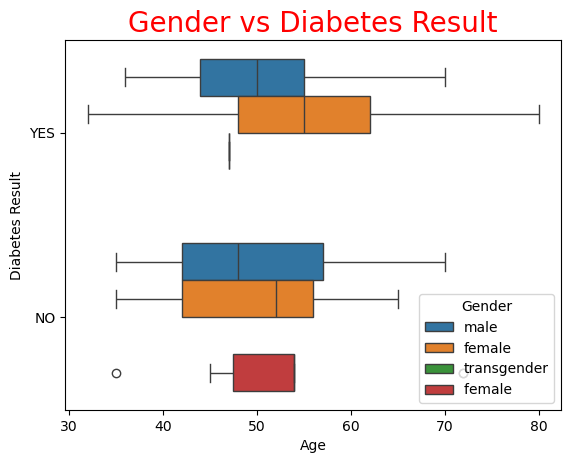

In [23]:
sns.boxplot(x='Age',y='Diabetes Result',data=df,hue='Gender')
plt.title('Gender vs Diabetes Result',color='red',size=20)
plt.show()

<Axes: xlabel='Place(location where the patient lives)', ylabel='Age'>

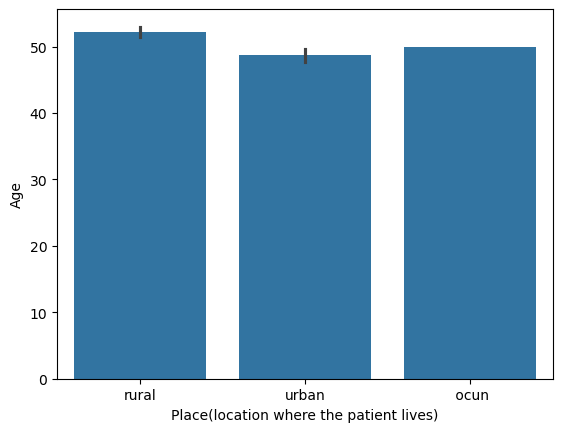

In [24]:
sns.barplot(x=df['Place(location where the patient lives)'],y=df['Age'])

Text(0.5, 1.0, 'Place vs Age')

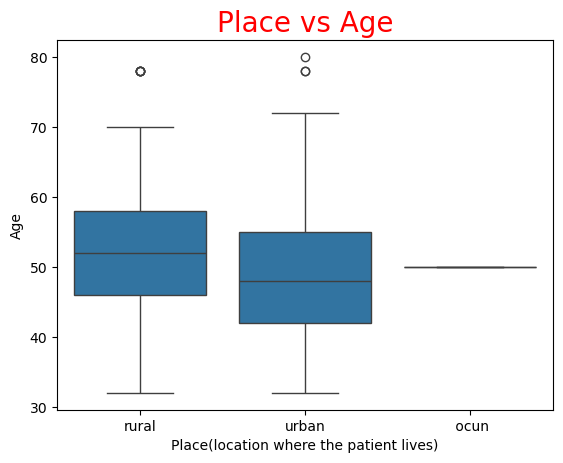

In [25]:
sns.boxplot(x='Place(location where the patient lives)',y='Age',data=df)
plt.title('Place vs Age',color='red',size=20)

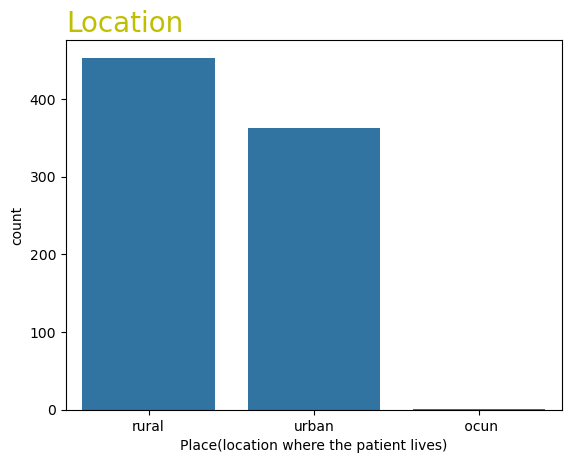

In [26]:
sns.countplot(data=df, x='Place(location where the patient lives)')
plt.title("Location", color="y", size=20, loc="left")
plt.show()

<Figure size 1600x1000 with 0 Axes>

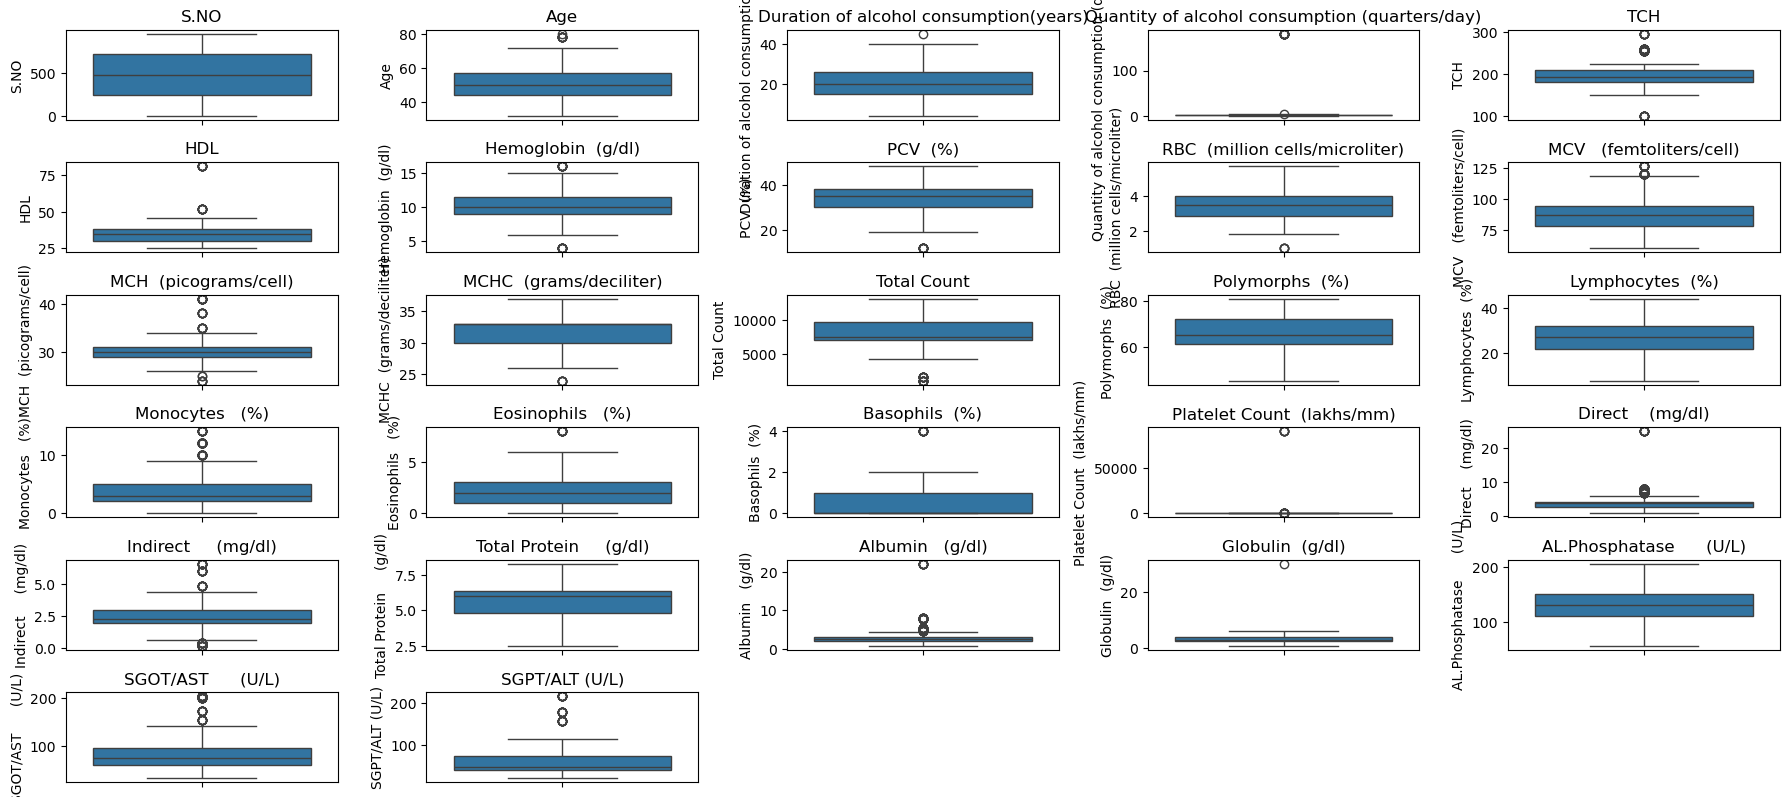

In [27]:
df = pd.read_csv(r"C:\Users\Priyanka\Downloads\HealthCareData.csv")
plt.figure(figsize=(16, 10))
num_cols = 5
num_rows = -(-len(df.columns) // num_cols)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 12))
axes = axes.flatten()
for i, col in enumerate(df.select_dtypes(include=['number']).columns):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(col)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

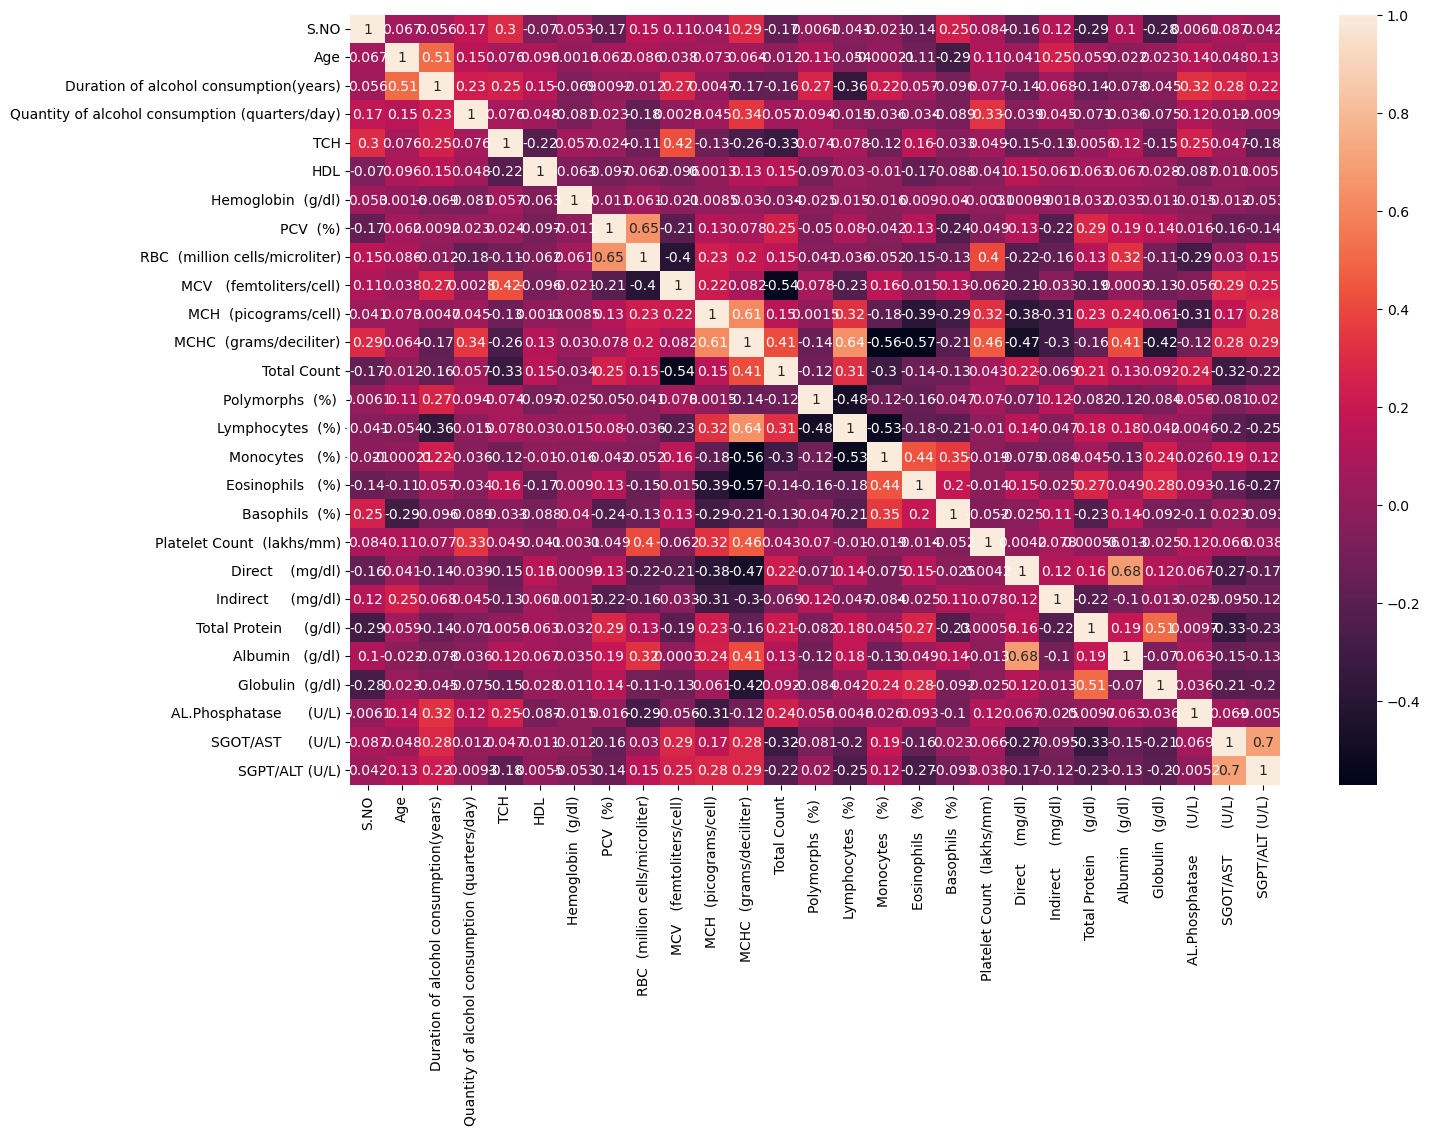

In [28]:
plt.figure(figsize=(15,10))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True)
plt.show()

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [31]:
x_train

array([[ 9, 10],
       [ 5,  6],
       [ 1,  2],
       [ 7,  8]])

In [32]:
x_test

array([[3, 4]])

In [33]:
y_train

array([0, 0, 0, 1])

In [34]:
y_test

array([1])

In [35]:
from sklearn.naive_bayes import GaussianNB

# Initialize the Gaussian Naive Bayes classifier
nb = GaussianNB()

# Train (fit) the model on the training data
nb.fit(x_train, y_train)


GaussianNB()

In [36]:
x_train

array([[ 9, 10],
       [ 5,  6],
       [ 1,  2],
       [ 7,  8]])

In [37]:
y_train

array([0, 0, 0, 1])

In [38]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [39]:
x_train

array([[ 9, 10],
       [ 5,  6],
       [ 1,  2],
       [ 7,  8]])

In [40]:
y_train

array([0, 0, 0, 1])

In [41]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
logistic = log.fit(x_train, y_train)

In [42]:
x_train

array([[ 9, 10],
       [ 5,  6],
       [ 1,  2],
       [ 7,  8]])

In [43]:
y_train

array([0, 0, 0, 1])

In [44]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [45]:
print("x_Train", x_train)
print("y_Train", y_train)

x_Train [[ 9 10]
 [ 5  6]
 [ 1  2]
 [ 7  8]]
y_Train [0 0 0 1]


In [46]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

In [47]:
k = np.random.randint(1,50,60)

In [48]:
params = {'n_neighbors' : k}

In [49]:
random_search = RandomizedSearchCV(knn, params, n_iter=5, cv=2, n_jobs=-1, verbose=0)
random_search.fit(x_train, y_train)

C:\Users\Priyanka\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
C:\Users\Priyanka\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:1102: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan]
  warnings.warn(


RandomizedSearchCV(cv=2, estimator=KNeighborsClassifier(), n_iter=5, n_jobs=-1,
                   param_distributions={'n_neighbors': array([33, 39, 16,  2, 38, 25, 17, 15, 18, 12, 27, 48, 48, 10, 37, 15,  1,
       39, 37, 14, 31, 38, 45, 30, 49, 37, 35, 14, 27, 26, 21, 22, 43, 25,
        1,  9, 33, 48,  3, 44,  4, 15,  9, 19, 22, 49, 12, 22, 27, 21, 11,
       17, 30, 38, 41, 20, 13, 30, 44, 16])})

In [51]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier  # Example model
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate sample dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a model and parameter grid
model = RandomForestClassifier()
param_dist = {'n_estimators': [10, 50, 100], 'max_depth': [5, 10, None]}

# Perform Randomized Search
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=5, cv=3, random_state=42)
random_search.fit(x_train, y_train)  # Fit the model

# Print train and test scores
print(f"train_score - {random_search.score(x_train, y_train):.6f}")
print(f"test_score - {random_search.score(x_test, y_test):.6f}")


train_score - 0.997500
test_score - 0.885000
